In [171]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [172]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [173]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [174]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Handling Missing Data 

In [175]:
percentage = pd.Series((df_train.isna().sum() / len(df_train)) * 100)
print(percentage)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


Vip column seems to have the highest percetage of missing columns . Other columns also have atleast 2-3% missing values this needs to be dealt carefully later.

In [176]:
#By numbers the missing value are 
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

We can Directly remove Passenger_Id and Name  column because they seem to have all unique values 

In [177]:
df_train.drop(columns=['Name','PassengerId'],inplace=True)
df_test.drop(columns=['Name','PassengerId'],inplace=True)
print(df_train.columns)

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')


In [178]:
print(df_train.head())

  HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0        False  
1        9.0          25.0   549.0    44.0         True  
2     3576.0           0.0  6715.0    49.0        False  
3     1283.0         371.0  3329.0   193.0        False  
4       70.0         151.0   565.0     2.0         True  


In [179]:
print("The number of duplicated rows {}".format(df_train.duplicated().sum()))

The number of duplicated rows 15


In [180]:
df_train.drop_duplicates(inplace=True)

we can fill the categorial columns with the mode values and the columns with non-categorial data with median or mean 

In [181]:
category = ['HomePlanet','CryoSleep','Cabin','Destination','VIP']

for i in category:
    df_train[i] = df_train[i].fillna(value = df_train[i].mode().iloc[0])

print(df_train.isna().sum())

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64


In [182]:
for i in df_train.columns :
    if df_train[i].dtype != object:
        df_train[i] = df_train[i].fillna(value = df_train[i].median())
    else:
        continue

print(df_train.isna().sum())

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


# Visualising data 


In [183]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8678 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8678 non-null   object 
 1   CryoSleep     8678 non-null   bool   
 2   Cabin         8678 non-null   object 
 3   Destination   8678 non-null   object 
 4   Age           8678 non-null   float64
 5   VIP           8678 non-null   bool   
 6   RoomService   8678 non-null   float64
 7   FoodCourt     8678 non-null   float64
 8   ShoppingMall  8678 non-null   float64
 9   Spa           8678 non-null   float64
 10  VRDeck        8678 non-null   float64
 11  Transported   8678 non-null   bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 703.4+ KB


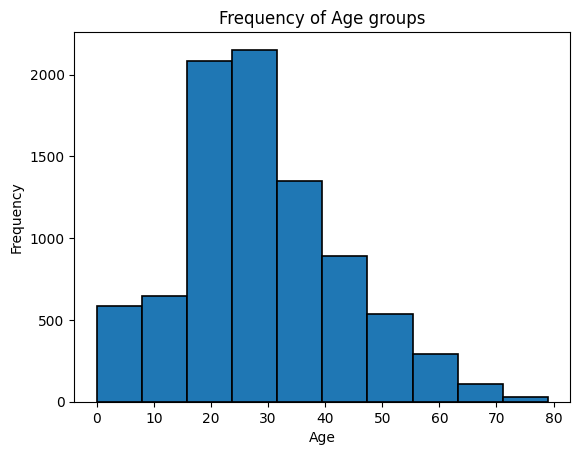

In [184]:
plt.hist(df_train.Age,linewidth = 1.2 , edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Frequency of Age groups")
plt.show()

In [185]:
vips = df_train['VIP'].value_counts().loc[True]
temp_df = df_train[['VIP','Transported']]
vips_survived = temp_df[temp_df['VIP'] == True].iloc[:,1].value_counts().loc[True]
per_vips = (vips_survived / vips ) * 100
normal = vips = df_train['VIP'].value_counts().loc[False]
normal_survived = temp_df[temp_df['VIP'] == False].iloc[:,1].value_counts().loc[True]
per_survived = normal_survived / normal

print("The Transportation rate for VIPS = {} \nThe Transportation rate for Normal passengers = {}".format(per_vips,per_survived))

The Transportation rate for VIPS = 38.19095477386934 
The Transportation rate for Normal passengers = 0.505602075716476


Opting for VIP class improved chances to get transported by multiple folds

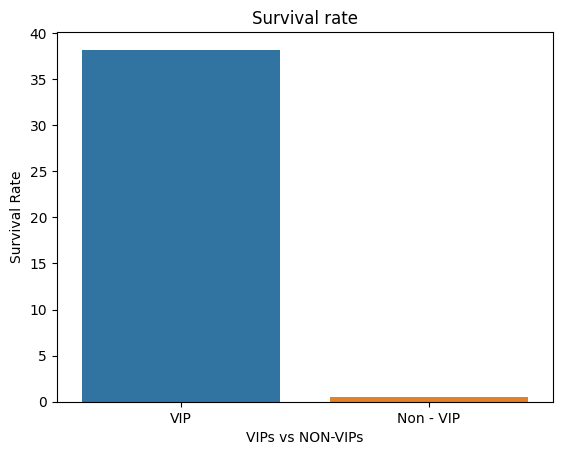

In [186]:
sns.barplot(x = ["VIP","Non - VIP"] , y = [per_vips,per_survived])
plt.xlabel("VIPs vs NON-VIPs")
plt.ylabel("Survival Rate")
plt.title("Survival rate")
plt.show()

Did spending on RoomService	, FoodCourt	, ShoppingMall , Spa ,VRDec increase the chances of transprotation ? 

In [187]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [188]:
room_service = df_train[df_train['RoomService'] > 0][["RoomService","Transported"]]
room_service = len(room_service[room_service['Transported'] == True])
no_room_service = df_train[df_train['RoomService'] == 0][['RoomService',"Transported"]]
no_room_service = len(no_room_service[no_room_service['Transported'] == True])
per_room_service = (room_service / len(df_train[df_train['RoomService'] > 0])) * 100
per_no_room_service = (no_room_service / len(df_train[df_train['RoomService'] == 0])) * 100

print("Percentage of transprotation who spent on room service {} \nPercentage of transprotation who did not spent on room service {}".format(per_room_service,per_no_room_service))


Percentage of transprotation who spent on room service 25.996592844974447 
Percentage of transprotation who did not spent on room service 62.68500783562598


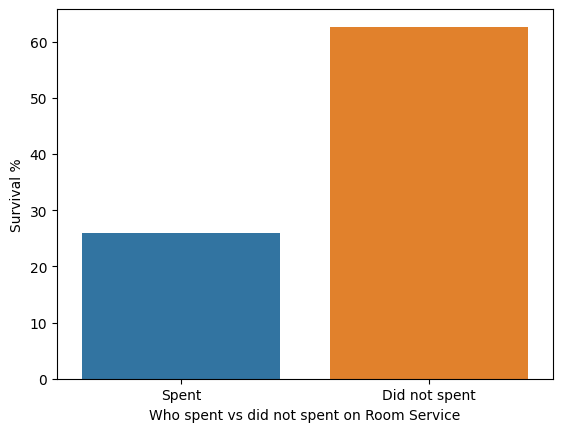

In [189]:
sns.barplot(x = ['Spent','Did not spent'],y = [per_room_service,per_no_room_service])
plt.xlabel("Who spent vs did not spent on Room Service")
plt.ylabel("Survival %")
plt.show()

Taking a look at OutLiers

In [190]:
col = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

sns.barplot(df_train , x = col)
plt.tight_layout()

plt.show()
    



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().